In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [9]:
import requests
requests.__version__

'2.25.1'

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=12f636f63349a3a0857157186c4992dc


In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=12f636f63349a3a0857157186c4992dc&q=Boston


In [21]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [22]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":54.14,"feels_like":51.89,"temp_min":51.39,"temp_max":56.55,"pressure":1023,"humidity":56},"visibility":10000,"wind":{"speed":27.63,"deg":30,"gust":34.52},"clouds":{"all":100},"dt":1664732359,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1664707334,"sunset":1664749484},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [23]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 54.14,
  'feels_like': 51.89,
  'temp_min': 51.39,
  'temp_max': 56.55,
  'pressure': 1023,
  'humidity': 56},
 'visibility': 10000,
 'wind': {'speed': 27.63, 'deg': 30, 'gust': 34.52},
 'clouds': {'all': 100},
 'dt': 1664732359,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1664707334,
  'sunset': 1664749484},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [26]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [27]:
# Get the JSON data.
boston_data = city_weather.json()

In [28]:
boston_data['sys'] 

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1664707334,
 'sunset': 1664749484}

In [30]:
boston_data['sys'] ['country'] 

'US'

In [31]:
boston_data["dt"]

1664738527

In [32]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 55.65 59 75 27.63


In [33]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 10, 2, 19, 22, 7)

In [34]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-10-02 19:22:07'

In [40]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [46]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 26 of Set 13 | guerrero negro
Processing Record 27 of Set 13 | narsaq
Processing Record 28 of Set 13 | vestmannaeyjar
Processing Record 29 of Set 13 | airai
Processing Record 30 of Set 13 | carnarvon
Processing Record 31 of Set 13 | poya
Processing Record 32 of Set 13 | albany
Processing Record 33 of Set 13 | busselton
Processing Record 34 of Set 13 | cayenne
Processing Record 35 of Set 13 | ushuaia
Processing Record 36 of Set 13 | port alfred
Processing Record 37 of Set 13 | atuona
Processing Record 38 of Set 13 | qaanaaq
Processing Record 39 of Set 13 | ilulissat
Processing Record 40 of Set 13 | sol-iletsk
Processing Record 41 of Set 13 | sitka
Processing Record 42 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 13 | arraial do cabo
Processing Record 44 of Set 13 | east london
Processing Record 45 of Set 13 | kalianget
Processing Record 46 of Set 13 | jamestown
Processing Record 47 of Set 13 | rikitea
Processing Record 48 of Set 13 | 

Processing Record 33 of Set 16 | kavieng
Processing Record 34 of Set 16 | mergui
City not found. Skipping...
Processing Record 35 of Set 16 | coquimbo
Processing Record 36 of Set 16 | ada
Processing Record 37 of Set 16 | roquetas de mar
Processing Record 38 of Set 16 | flin flon
Processing Record 39 of Set 16 | catamarca
Processing Record 40 of Set 16 | grindavik
Processing Record 41 of Set 16 | champerico
Processing Record 42 of Set 16 | falun
Processing Record 43 of Set 16 | san borja
Processing Record 44 of Set 16 | broken hill
Processing Record 45 of Set 16 | fairbanks
Processing Record 46 of Set 16 | wanlaweyn
Processing Record 47 of Set 16 | tonekabon
Processing Record 48 of Set 16 | tarudant
City not found. Skipping...
Processing Record 49 of Set 16 | petropavlovsk-kamchatskiy
Processing Record 50 of Set 16 | jumla
Processing Record 1 of Set 17 | belyy yar
Processing Record 2 of Set 17 | rocha
Processing Record 3 of Set 17 | dasoguz
Processing Record 4 of Set 17 | la roche-sur-y

Processing Record 21 of Set 20 | ancud
Processing Record 22 of Set 20 | gao
Processing Record 23 of Set 20 | mulanje
Processing Record 24 of Set 20 | odweyne
Processing Record 25 of Set 20 | longlac
City not found. Skipping...
Processing Record 26 of Set 20 | college
Processing Record 27 of Set 20 | taoudenni
Processing Record 28 of Set 20 | berlevag
Processing Record 29 of Set 20 | berbera
Processing Record 30 of Set 20 | toyooka
Processing Record 31 of Set 20 | pedernales
Processing Record 32 of Set 20 | port blair
Processing Record 33 of Set 20 | voh
Processing Record 34 of Set 20 | tabiauea
City not found. Skipping...
Processing Record 35 of Set 20 | sur
Processing Record 36 of Set 20 | balabac
Processing Record 37 of Set 20 | olafsvik
Processing Record 38 of Set 20 | sola
Processing Record 39 of Set 20 | nam tha
City not found. Skipping...
Processing Record 40 of Set 20 | montefiascone
Processing Record 41 of Set 20 | san buenaventura
Processing Record 42 of Set 20 | yaan
Processi

Processing Record 6 of Set 24 | independence
Processing Record 7 of Set 24 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 24 | corinto
Processing Record 9 of Set 24 | muros
Processing Record 10 of Set 24 | bati
Processing Record 11 of Set 24 | cape canaveral
Processing Record 12 of Set 24 | goba
Processing Record 13 of Set 24 | kahului
Processing Record 14 of Set 24 | margate
Processing Record 15 of Set 24 | guinticgan
Processing Record 16 of Set 24 | grand gaube
Processing Record 17 of Set 24 | lodja
Processing Record 18 of Set 24 | ambilobe
Processing Record 19 of Set 24 | jalu
Processing Record 20 of Set 24 | panaba
Processing Record 21 of Set 24 | yatou
Processing Record 22 of Set 24 | taggia
Processing Record 23 of Set 24 | tumannyy
City not found. Skipping...
Processing Record 24 of Set 24 | srandakan
Processing Record 25 of Set 24 | pochutla
Processing Record 26 of Set 24 | visby
Processing Record 27 of Set 24 | kindersley
Processing Record 28 of Set 24 |

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)


In [55]:
# displaying first 10 rows of the dataframe
city_data_df.head (10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guerrero Negro,MX,2022-10-03 02:34:30,27.9769,-114.0611,68.49,79,3,15.46
1,Narsaq,GL,2022-10-03 02:34:26,60.9167,-46.0500,35.82,64,51,5.12
2,Vestmannaeyjar,IS,2022-10-03 02:34:30,63.4427,-20.2734,49.96,85,100,12.37
3,Airai,TL,2022-10-03 02:34:31,-8.9266,125.4092,72.97,64,97,1.01
4,Carnarvon,AU,2022-10-03 02:34:30,-24.8667,113.6333,74.61,40,0,13.65
5,Poya,NC,2022-10-03 02:34:31,-21.3500,165.1500,76.96,59,80,11.45
6,Albany,US,2022-10-03 02:32:17,42.6001,-73.9662,48.34,65,100,4.41
7,Busselton,AU,2022-10-03 02:34:32,-33.6500,115.3333,60.84,45,75,11.23
8,Cayenne,GF,2022-10-03 02:30:04,4.9333,-52.3333,77.04,94,0,0.00
9,Ushuaia,AR,2022-10-03 02:34:32,-54.8000,-68.3000,40.66,81,0,3.44


In [51]:
# Renaming the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [56]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

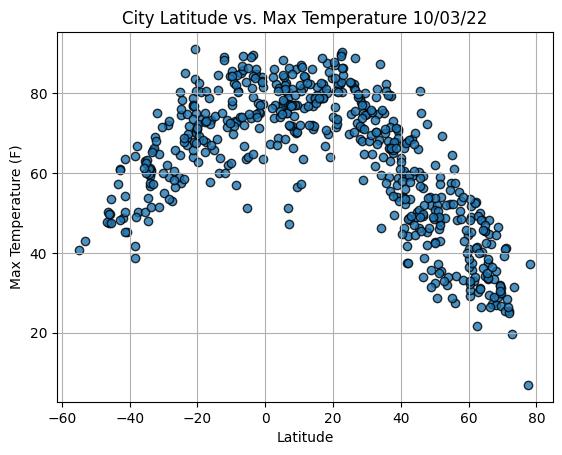

In [57]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

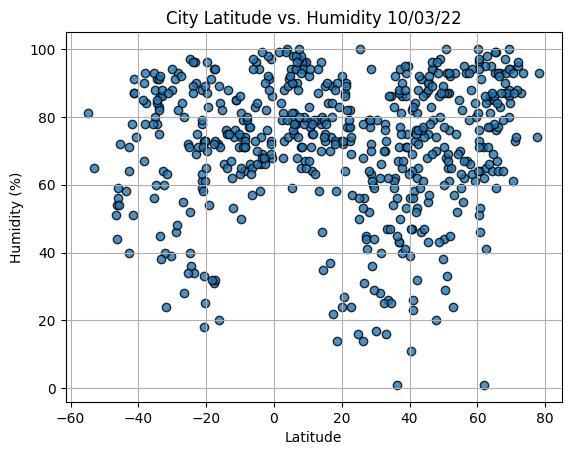

In [58]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

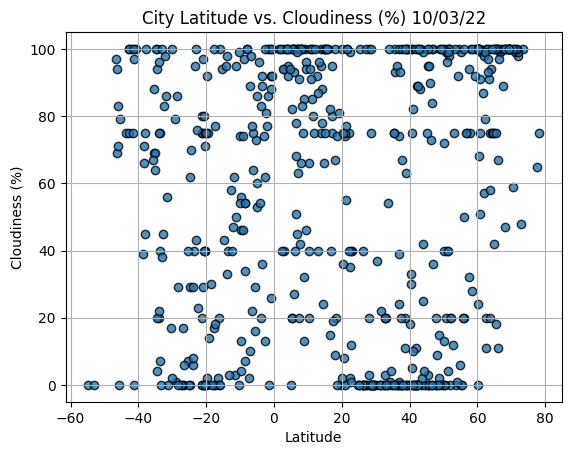

In [59]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

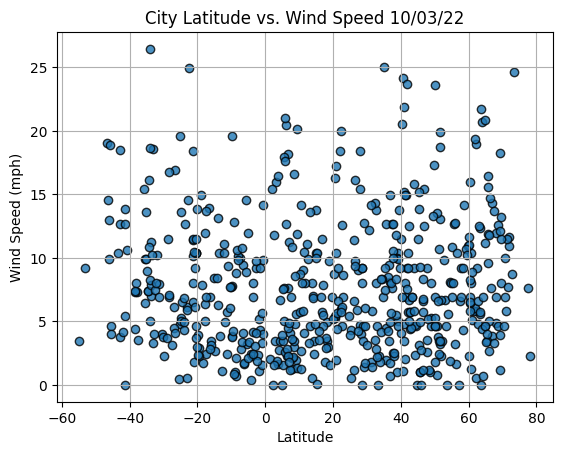

In [60]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()